In [1]:
import pandas as pd

In [2]:
## load Customers
loanDF = pd.read_csv('../train.txt')

loanDF

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

In [3]:
# drop NA fields
loanDF = loanDF.dropna(axis=0, subset=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'])

loanDF

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[554 rows x 13 columns]

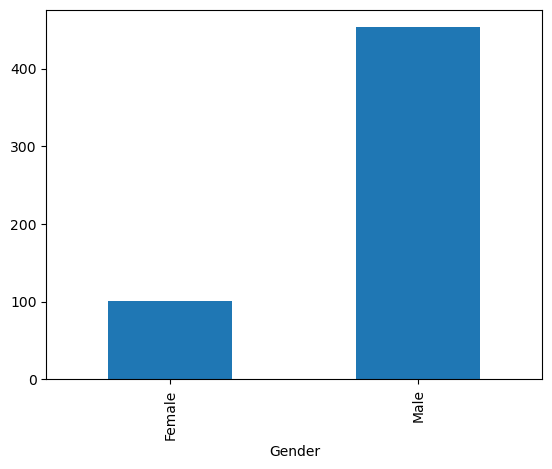

In [4]:
## try to gain insight on data
loanDF.groupby('Gender').Loan_Status.count().plot(kind='bar');

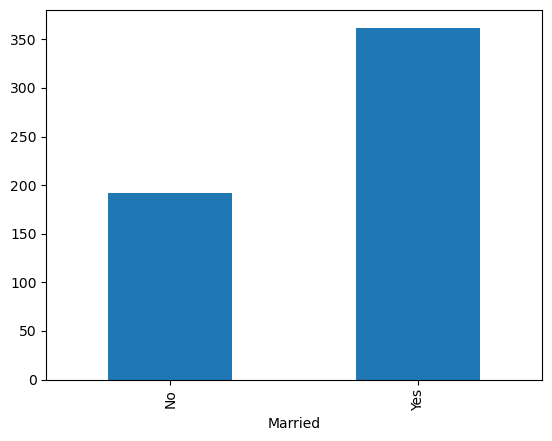

In [5]:
## more data describing.
loanDF.groupby('Married').Loan_Status.count().plot(kind='bar');

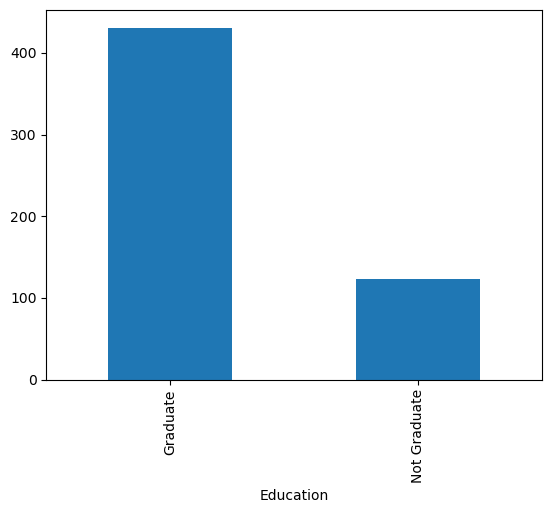

In [6]:
## more data
loanDF.groupby('Education').Loan_Status.count().plot(kind='bar');

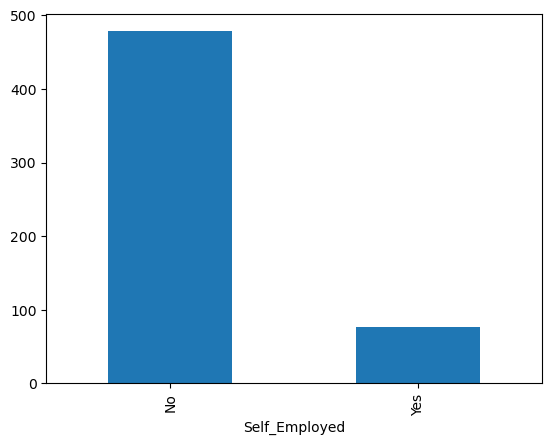

In [7]:
loanDF.groupby('Self_Employed').Loan_Status.count().plot(kind='bar');

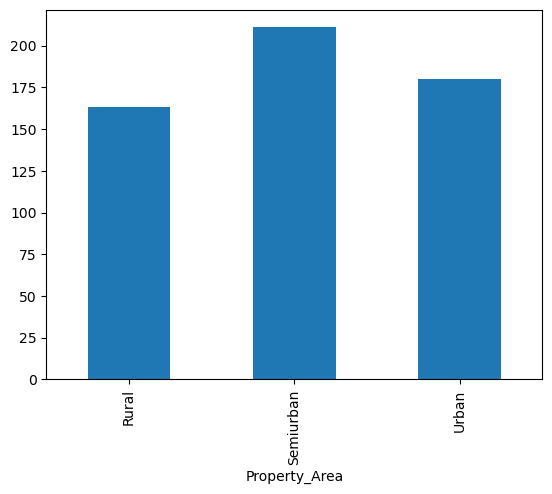

In [8]:
loanDF.groupby('Property_Area').Loan_Status.count().plot(kind='bar');

In [9]:
## loan status from training
outcomes = loanDF['Loan_Status']
loanDF = loanDF.drop('Loan_Status', axis=1)
loanDF = loanDF.drop('Property_Area', axis=1)

outcomes.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [10]:
loanDF.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  
0             1.0  
1             1.0  
2             1.0  
3             1.0  
4             1.0

In [11]:
# Removing the names
features_no_loanID = loanDF.drop(['Loan_ID'], axis=1)
features_no_marriage = features_no_loanID.drop(['Married'], axis=1)

# One-hot encoding
features = pd.get_dummies(features_no_marriage)
features

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History  Gender_Female  Gender_Male  Dependents_0  Dependents_1  \
0               1.0              0            1             1             0   
1               1.0              0            1             0             1   
2               1.0              0            1             1             0   
3               1.0              0            1             1             0   
4               1.0              0            1             1             0   
..              ...            ...          ...           ...           ...   
609             1.0              1            0             1             0   
610             1.0              0            1             0             0   
611             1.0              0            1             0             1   
612             1.0              0            1             0             0   
613             0.0              1            0             1             0   

     Dependents_2  Dependents_3+  Education_Graduate  Education_Not Graduate  \
0               0              0                   1                       0   
1               0              0                   1                       0   
2               0              0                   1                       0   
3               0              0                   0                       1   
4               0              0                   1                       0   
..            ...            ...                 ...                     ...   
609             0              0                   1                       0   
610             0              1                   1                       0   
611             0              0                   1                       0   
612             1              0                   1                       0   
613             0              0                   1                       0   

     Self_Employed_No  Self_Employed_Yes  
0                   1                  0  
1                   1                  0  
2                   0                  1  
3                   1                  0  
4                   1                  0  
..                ...                ...  
609                 1                  0  
610                 1                  0  
611                 1                  0  
612                 1                  0  
613                 0                  1  

[554 rows x 15 columns]

In [12]:
# fill the NAN column with zero
features = features.fillna(0.0)
features

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         0.0             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History  Gender_Female  Gender_Male  Dependents_0  Dependents_1  \
0               1.0              0            1             1             0   
1               1.0              0            1             0             1   
2               1.0              0            1             1             0   
3               1.0              0            1             1             0   
4               1.0              0            1             1             0   
..              ...            ...          ...           ...           ...   
609             1.0              1            0             1             0   
610             1.0              0            1             0             0   
611             1.0              0            1             0             1   
612             1.0              0            1             0             0   
613             0.0              1            0             1             0   

     Dependents_2  Dependents_3+  Education_Graduate  Education_Not Graduate  \
0               0              0                   1                       0   
1               0              0                   1                       0   
2               0              0                   1                       0   
3               0              0                   0                       1   
4               0              0                   1                       0   
..            ...            ...                 ...                     ...   
609             0              0                   1                       0   
610             0              1                   1                       0   
611             0              0                   1                       0   
612             1              0                   1                       0   
613             0              0                   1                       0   

     Self_Employed_No  Self_Employed_Yes  
0                   1                  0  
1                   1                  0  
2                   0                  1  
3                   1                  0  
4                   1                  0  
..                ...                ...  
609                 1                  0  
610                 1                  0  
611                 1                  0  
612                 1                  0  
613                 0                  1  

[554 rows x 15 columns]

# Training the model

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, outcomes, test_size=0.2, random_state=42)

In [14]:
# Import the classifier from sklearn
from sklearn.tree import DecisionTreeClassifier

# TODO: Define the classifier, and fit it to the data
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

# Testing the model

In [15]:
# Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [16]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 1.0
The test accuracy is 0.7207207207207207


In [31]:
# Training the model
model1 = DecisionTreeClassifier(max_depth=1, min_samples_leaf=5, min_samples_split=10)
model1.fit(X_train, y_train)




# Making predictions
y_train_pred1 = model1.predict(X_train)
y_test_pred1 = model1.predict(X_test)

# Calculating accuracies
train_accuracy1 = accuracy_score(y_train, y_train_pred1)
test_accuracy1 = accuracy_score(y_test, y_test_pred1)

print('The training accuracy is', train_accuracy1)
print('The test accuracy is', test_accuracy1)

The training accuracy is 0.7494356659142212
The test accuracy is 0.8018018018018018


## training with linear regression 

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np

In [25]:
linearModel = LogisticRegression()

linearModel.fit(X_train, y_train)


# Making predictions
ly_train_pred = linearModel.predict(X_train)
ly_test_pred = linearModel.predict(X_test)

# Calculating accuracies
ltrain_accuracy = accuracy_score(y_train, ly_train_pred)
ltest_accuracy = accuracy_score(y_test, ly_test_pred)

print('The training accuracy is', ltrain_accuracy)
print('The test accuracy is', ltest_accuracy)

The training accuracy is 0.744920993227991
The test accuracy is 0.7477477477477478


# Training with Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

rF = RandomForestClassifier(max_depth=15, random_state=42)

rF.fit(X_train, y_train)


# Making predictions
ry_train_pred = rF.predict(X_train)
ry_test_pred = rF.predict(X_test)

# Calculating accuracies
rtrain_accuracy = accuracy_score(y_train, ry_train_pred)
rtest_accuracy = accuracy_score(y_test, ry_test_pred)

print('The training accuracy is', rtrain_accuracy)
print('The test accuracy is', rtest_accuracy)

The training accuracy is 0.9954853273137697
The test accuracy is 0.8108108108108109
